<h1 style="text-align:center">Deep Learning   </h1>
<h1 style="text-align:center"> Lab Session 2 - 3 Hours </h1>
<h1 style="text-align:center"> Convolutional Neural Network (CNN) for Handwritten Digits Recognition</h1>

<div class="alert alert-info">
<b> Student 1:</b> Daniele Reda  
<br>
<b> Student 2:</b> Matteo Romiti
</div> 
 
The aim of this session is to practice with Convolutional Neural Networks. Answers and experiments should be made by groups of one or two students. Each group should fill and run appropriate notebook cells. 


Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an pdf document using print as PDF (Ctrl+P). Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by May 29th 2017.

Send you pdf file to benoit.huet@eurecom.fr and olfa.ben-ahmed@eurecom.fr using **[DeepLearning_lab2]** as Subject of your email.

# Introduction

In the last Lab Session, you built a Multilayer Perceptron for recognizing hand-written digits from the MNIST data-set. The best achieved accuracy on testing data was about 97%.  Can  you do better than these results using a deep CNN ?
In this Lab Session, you will build, train and optimize in TensorFlow one of the early Convolutional Neural Networks:  **LeNet-5** to go to  more than 99% of accuracy. 






# Load MNIST Data in TensorFlow
Run the cell above to load the MNIST data that comes  with TensorFlow. You will use this data in **Section 1** and **Section 2**.

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
X_train, y_train           = mnist.train.images, mnist.train.labels
X_validation, y_validation = mnist.validation.images, mnist.validation.labels
X_test, y_test             = mnist.test.images, mnist.test.labels
print("Image Shape:    {}".format(X_train[0].shape))
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_validation)))
print("Test Set:       {} samples".format(len(X_test)))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Image Shape:    (784,)
Training Set:   55000 samples
Validation Set: 5000 samples
Test Set:       10000 samples


# Section 1 : My First Model in TensorFlow

Before starting with CNN, let's train and test in TensorFlow the example :
**y=softmax(Wx+b)** seen in the DeepLearing course last week. 

This model reaches an accuracy of about 92 %.
You will also learn how to launch the tensorBoard https://www.tensorflow.org/get_started/summaries_and_tensorboard to  visualize the computation graph, statistics and learning curves. 

<b> Part 1 </b> : Read carefully the code in the cell below. Run it to perform training. 

In [2]:
#STEP 1

# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 128
display_step = 2
logs_path = 'log_files/'  # useful for tensorboard

# tf Graph Input:  mnist data image of shape 28*28=784
x = tf.placeholder(tf.float32, [None, 784], name='InputData')
# 0-9 digits recognition,  10 classes
y = tf.placeholder(tf.float32, [None, 10], name='LabelData')

# Set model weights
W = tf.Variable(tf.zeros([784, 10]), name='Weights')
b = tf.Variable(tf.zeros([10]), name='Bias')

# Construct model and encapsulating all ops into scopes, making Tensorboard's Graph visualization more convenient
with tf.name_scope('Model'):
    # Model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
with tf.name_scope('Loss'):
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
with tf.name_scope('SGD'):
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
with tf.name_scope('Accuracy'):
    # Accuracy
    acc = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    acc = tf.reduce_mean(tf.cast(acc, tf.float32))

# Initializing the variables
init = tf.global_variables_initializer()
# Create a summary to monitor cost tensor
tf.summary.scalar("Loss", cost)
# Create a summary to monitor accuracy tensor
tf.summary.scalar("Accuracy", acc)
# Merge all summaries into a single op
merged_summary_op = tf.summary.merge_all()


#STEP 2 


# Launch the graph for training
with tf.Session() as sess:
    sess.run(init)
    # op to write logs to Tensorboard
    summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples/batch_size)
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            # Run optimization op (backprop), cost op (to get loss value)
            # and summary nodes
            _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                     feed_dict={x: batch_xs, y: batch_ys})
            # Write logs at every iteration
            summary_writer.add_summary(summary, epoch * total_batch + i)
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if (epoch+1) % display_step == 0:
            print("Epoch: ", '%02d' % (epoch+1), "  =====> Loss=", "{:.9f}".format(avg_cost))

    print("Optimization Finished!")

    # Test model
    # Calculate accuracy
    print("Accuracy:", acc.eval({x: mnist.test.images, y: mnist.test.labels}))




Epoch:  02   =====> Loss= 0.733064874
Epoch:  04   =====> Loss= 0.536358523
Epoch:  06   =====> Loss= 0.471889261
Epoch:  08   =====> Loss= 0.435504827
Epoch:  10   =====> Loss= 0.412166757
Epoch:  12   =====> Loss= 0.397256630
Epoch:  14   =====> Loss= 0.384323012
Epoch:  16   =====> Loss= 0.374909195
Epoch:  18   =====> Loss= 0.365859221
Epoch:  20   =====> Loss= 0.358819640
Epoch:  22   =====> Loss= 0.353986612
Epoch:  24   =====> Loss= 0.349985992
Epoch:  26   =====> Loss= 0.345158857
Epoch:  28   =====> Loss= 0.340375543
Epoch:  30   =====> Loss= 0.337398454
Epoch:  32   =====> Loss= 0.333335278
Epoch:  34   =====> Loss= 0.330760923
Epoch:  36   =====> Loss= 0.326252774
Epoch:  38   =====> Loss= 0.325419832
Epoch:  40   =====> Loss= 0.322225989
Epoch:  42   =====> Loss= 0.320298648
Epoch:  44   =====> Loss= 0.319281198
Epoch:  46   =====> Loss= 0.318291789
Epoch:  48   =====> Loss= 0.314709458
Epoch:  50   =====> Loss= 0.313845383
Epoch:  52   =====> Loss= 0.309665868
Epoch:  54  

<b> Part 2  </b>: Using Tensorboard, we can  now visualize the created graph, giving you an overview of your architecture and how all of the major components  are connected. You can also see and analyse the learning curves. 

To launch tensorBoard: 
- Go to the **TP2** folder, 
- Open a Terminal and run the command line **"tensorboard --logdir= log_files/"**, it will generate an http link ,ex http://666.6.6.6:6006,
- Copy this  link into your web browser 


Enjoy It !! 


# Section 2 : The 99% MNIST Challenge !

<b> Part 1 </b> : LeNet5 implementation

Once you are familar with **tensorFlow** and **tensorBoard**, you are in this section to build, train and test the baseline [LeNet-5](http://yann.lecun.com/exdb/lenet/)  model for the MNIST digits recognition problem.  

In more advanced step you will make some optimizations to get more than 99% of accuracy. The best model can get to over 99.7% accuracy! 

For more information, have a look at this list of results : http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

<img src="lenet.png",width="800" height="600" align="center">
<center><span>Figure 1: Lenet 5 </span></center>



The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

--------------------------
**Layer 1: Convolutional.** The output shape should be 28x28x6 **Activation.** sigmoid **Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16. **Activation.** sigmoid **Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D.  You may need to use **flatten*  from tensorflow.contrib.layers import flatten

**Layer 3: Fully Connected.** This should have 120 outputs. **Activation.** sigmoid

**Layer 4: Fully Connected.** This should have 84 outputs. **Activation.** sigmoid

**Layer 5: Fully Connected.** This should have 10 outputs **Activation.** softmax.


<b> Question 2.1.1 </b>  Implement the Neural Network architecture described above.
For that, your will use classes and functions from  https://www.tensorflow.org/api_docs/python/tf/nn. 

We give you some helper functions for weigths and bias initilization. Also you can refer to section 1. 


In [2]:
# Helper functions  for weigths and bias initilization 
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W, stride, padding_):
    return tf.nn.conv2d(x, W, strides=[1, stride, stride, 1], padding=padding_)

In [3]:
def LeNet5_Model(data, transfer="sigmoid", keep_prob=1.):    
    # your implementation goes here
    
    transferFuncs = {"sigmoid" : tf.sigmoid, "ReLU": tf.nn.relu}
        
    #first convolutional layer
    W_conv1 = weight_variable([5, 5, 1, 6]) ## [filter_width, filter_height, depth_image_in, depth_image_out]
    b_conv1 = bias_variable([6])
    h_conv1 = transferFuncs[transfer](conv2d(data, W_conv1, 1, 'SAME') + b_conv1)
    pool1 = tf.nn.pool(h_conv1, [2,2], "MAX", 'VALID', strides=[2,2])
    
    #second convolutional layer
    W_conv2 = weight_variable([5, 5, 6, 16])
    b_conv2 = bias_variable([16])
    h_conv2 = transferFuncs[transfer](conv2d(pool1, W_conv2, 1, 'VALID') + b_conv2)
    pool2 = tf.nn.pool(h_conv2, [2,2], "MAX", 'VALID', strides=[2,2])
    
    #first fully connected layer
    s = pool2.get_shape().as_list()
    flattened_length = s[1] * s[2] * s[3]
    pool2_flat = tf.reshape(pool2, [-1, flattened_length])
    W_fc1 = weight_variable([1*5*5*16, 120])
    b_fc1 = bias_variable([120])
    h_fc1 = transferFuncs[transfer](tf.matmul(pool2_flat, W_fc1) + b_fc1)
    h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

    #second fully connected layer
    W_fc2 = weight_variable([120, 84])
    b_fc2 = bias_variable([84])
    h_fc2 = transferFuncs[transfer](tf.matmul(h_fc1_drop, W_fc2) + b_fc2)
    h_fc2_drop = tf.nn.dropout(h_fc2, keep_prob)
    
    #third fully connected layer
    W_fc3 = weight_variable([84, 10])
    b_fc3 = bias_variable([10])
    h_fc3 = tf.nn.softmax(tf.matmul(h_fc2_drop, W_fc3) + b_fc3)
    
    return h_fc3

<b> Question 2.1.2. </b>  Calculate the number of parameters of this model 

In [5]:
# first conv
pconv1 = 5*5*1*6 # filter_height * filter_width * channels_in * num_feature_maps
# second conv
pconv2 = 5*5*1*16 # filter_height * filter_width * channels_in * num_feature_maps
# first fcl
pfcl1 = 5*5*16*120 # fcl_input_size * fcl_output_size
pfcl1# second fcl
pfcl2 = 84*120 # fcl_input_size * fcl_output_size
# third fcl
pfcl3 = 84*10 # fcl_input_size * fcl_output_size
pbias = 6+16+120+84+10 # all the biases
total = pbias + pfcl1 + pfcl2 + pfcl3 + pconv2 + pconv1
print(total)

59706


<b> Question 2.1.3. </b>  Start the training with the parameters cited below:

     Learning rate : 0.1
     Loss Function : Cross entropy
     Optimizer: SGD
     Number of training iterations : 10000
     Batch size : 128

In [8]:
learning_rate = 0.1
training_epochs = 200 # as suggested in the email
batch_size = 128
display_step = 10
logs_path = 'log_files/'

<b> Question 2.1.4. </b>  Implement the evaluation function for accuracy computation 

In [4]:
def evaluate(model, y):
    correct = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
    return tf.reduce_mean(tf.cast(correct, tf.float32))

<b> Question 2.1.5. </b>  Implement training pipeline and run the training data through it to train the model.

- Before each epoch, shuffle the training set. 
- Print the loss per mini batch and the training/validation accuracy per epoch. (Display results every 100 epochs)
- Save the model after training
- Print after training the final testing accuracy 



In [5]:
def train(learning_rate, training_epochs, batch_size, display_step = 1, \
          logs_path='log_files/', optFunction="SGD", verbose=True, transfer="sigmoid", keep_probability= 1.0):
    
    optFunctions = {"SGD":tf.train.GradientDescentOptimizer, "Adam":tf.train.AdamOptimizer}
    
    # Erase previous graph
    tf.reset_default_graph()

    x = tf.placeholder(tf.float32, [None, 28, 28, 1], name='InputData')
    y = tf.placeholder(tf.float32, [None, 10], name='LabelData')
    keep_prob = tf.placeholder(tf.float32)

    # Construct model
    with tf.name_scope('Model'):
        pred = LeNet5_Model(x, transfer=transfer)

    # Define loss and optimizer
    with tf.name_scope('Loss'):
        cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))
        #cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

    with tf.name_scope(optFunction):
        if transfer is "sigmoid":
            optimizer = optFunctions[optFunction](learning_rate).minimize(cost)
        else:
            opt = optFunctions[optFunction](learning_rate)
            gvs = opt.compute_gradients(cost)
            capped_gvs = [(tf.clip_by_value(grad, -1., 1.), var) for grad, var in gvs]
            optimizer = opt.apply_gradients(capped_gvs)

    # Evaluate model
    with tf.name_scope('Accuracy'):
        accuracy = evaluate(pred, y)

    # Initializing the variables
    init = tf.global_variables_initializer()

    # Create a summary to monitor cost tensor
    tf.summary.scalar("Loss", cost)
    # Create a summary to monitor accuracy tensor
    tf.summary.scalar("Accuracy", accuracy)
    # Merge all summaries into a single op
    merged_summary_op = tf.summary.merge_all()

    x_val, y_val = mnist.validation.images.reshape(-1, 28, 28, 1), mnist.validation.labels
    x_test, y_test = mnist.test.images.reshape(-1, 28, 28, 1), mnist.test.labels

    with tf.Session() as sess:
#         acc_history = []
        test_history = []
        val_history = []
#         train_history = []

        sess.run(init)
        if verbose is True:
            print("Start Training!")
        # op to write logs to Tensorboard
        summary_writer = tf.summary.FileWriter(logs_path, graph=tf.get_default_graph())
        saver = tf.train.Saver()
        #Training cycle
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            #Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                batch_xs = batch_xs.reshape(-1, 28, 28, 1)
                # Run optimization op (backprop), cost op (to get loss value)
                # and summary nodes
                _, c, summary = sess.run([optimizer, cost, merged_summary_op],
                                         feed_dict={x: batch_xs, y: batch_ys, keep_prob: keep_probability})
#                 _, c, summary = sess.run([optimizer, cost, merged_summary_op],
#                                          feed_dict={x: batch_xs, y: batch_ys, keep_prob:keep_prob_})
                # Write logs at every iteration
                summary_writer.add_summary(summary, epoch * total_batch + i)
                # Compute average loss
                avg_cost += c / total_batch
            # Display logs per epoch step
#             train_acc = accuracy.eval({x: batch_xs, y:batch_ys})
            val_acc = accuracy.eval({x: x_val, y:y_val, keep_prob:1.0})
            test_acc = accuracy.eval({x: x_test, y:y_test, keep_prob:1.0})
#             acc_history.append(acc)
#             train_history.append(train_acc)
            val_history.append(val_acc)
            test_history.append(test_acc)
            
            saver.save(sess, 'Models/model_' + str(learning_rate) + '_' + str(batch_size) + '_' + optFunction)
            if verbose is True and (epoch+1) % display_step == 0:
                print("Epoch: ", '%02d' % (epoch+1), \
                      "  =====> Loss=", "{:.9f}".format(avg_cost), \
                      " Validation accuracy=", val_acc, " Test accuracy=", test_acc)
            if val_acc>=0.99:
                if verbose is True:
                    print("Validation Accuracy over 99%% reached after %d epochs" %(epoch+1))
                break
                
        if verbose is True:
            print("Training Finished!")
            # Test model
            # Calculate accuracy
            print("Test accuracy:", accuracy.eval({x: x_test, y:y_test, keep_prob:1.0}))
        
    return val_history, test_history

`train.next_batch()` has shuffle parameter set to True by default.

In [9]:
val_hist, test_hist = train(learning_rate, training_epochs, batch_size)

Start Training!
Epoch:  01   =====> Loss= 2.306711101  Validation accuracy= 0.1126  Test accuracy= 0.1135
Epoch:  02   =====> Loss= 2.305636428  Validation accuracy= 0.1126  Test accuracy= 0.1135
Epoch:  03   =====> Loss= 2.304683939  Validation accuracy= 0.099  Test accuracy= 0.1009
Epoch:  04   =====> Loss= 2.304435188  Validation accuracy= 0.0986  Test accuracy= 0.101
Epoch:  05   =====> Loss= 2.302418652  Validation accuracy= 0.1126  Test accuracy= 0.1135
Epoch:  06   =====> Loss= 2.300473815  Validation accuracy= 0.0868  Test accuracy= 0.0892
Epoch:  07   =====> Loss= 2.294925442  Validation accuracy= 0.1582  Test accuracy= 0.1736
Epoch:  08   =====> Loss= 2.272766478  Validation accuracy= 0.2568  Test accuracy= 0.2669
Epoch:  09   =====> Loss= 1.972761237  Validation accuracy= 0.5516  Test accuracy= 0.5554
Epoch:  10   =====> Loss= 1.132301843  Validation accuracy= 0.7514  Test accuracy= 0.7543
Epoch:  11   =====> Loss= 0.731297972  Validation accuracy= 0.8326  Test accuracy= 0.8

([0.1126,
  0.1126,
  0.098999999,
  0.0986,
  0.1126,
  0.086800002,
  0.1582,
  0.2568,
  0.55159998,
  0.75139999,
  0.8326,
  0.8642,
  0.89480001,
  0.91780001,
  0.92940003,
  0.94019997,
  0.94639999,
  0.94880003,
  0.95480001,
  0.95880002,
  0.9612,
  0.96460003,
  0.96640003,
  0.96759999,
  0.96960002,
  0.97000003,
  0.97039998,
  0.97100002,
  0.97299999,
  0.97399998,
  0.97259998,
  0.9738,
  0.97600001,
  0.97719997,
  0.97539997,
  0.97719997,
  0.97659999,
  0.97640002,
  0.97600001,
  0.97839999,
  0.9788,
  0.97799999,
  0.97759998,
  0.9788,
  0.97979999,
  0.98000002,
  0.9806,
  0.98220003,
  0.98040003,
  0.98000002,
  0.97979999,
  0.98180002,
  0.98079997,
  0.98159999,
  0.9824,
  0.98199999,
  0.98280001,
  0.98299998,
  0.98339999,
  0.98460001,
  0.98400003,
  0.98360002,
  0.98339999,
  0.98360002,
  0.98360002,
  0.9842,
  0.98199999,
  0.98439997,
  0.98360002,
  0.98460001,
  0.98540002,
  0.98379999,
  0.98500001,
  0.98460001,
  0.98479998,
  0.9846

<b> Question 2.1.6 </b> : Use tensorBoard to visualise and save the LeNet5 Graph and all learning curves. 
Save all obtained figures in the folder **"TP2/MNIST_99_Challenge_Figures"**

<h1 style="text-align:center">Graph Model</h1>
<img src="MNIST_99_Challenge_Figures/graph.png">
<h1 style="text-align:center">Accuracy</h1>
<img src="MNIST_99_Challenge_Figures/accuracy.png">
<h1 style="text-align:center">Loss</h1>
<img src="MNIST_99_Challenge_Figures/loss.png">

<b> Part 2 </b> : LeNET 5 Optimization


<b> Question 2.2.1 </b>  Change the sigmoid function with a ReLU :

- Retrain your network with SGD and AdamOptimizer and then fill the table above  :


| Optimizer            |  Gradient Descent         |AdamOptimizer |
| -------------        |: -------------: | ---------:   
| Validation Accuracy  |   0.9858      |   0.992 |      
| Testing Accuracy     |    0.9842       |  0.9892  |       
| Training Time        |     6176s      |    465s    |  |  


- Try with different learning rates for each Optimizer (0.0001 and 0.001 ) and different Batch sizes (50 and 128) for 20000 Epochs. 

- For each optimizer, plot (on the same curve) the **testing accuracies** function to **(learning rate, batch size)** 



- Did you reach the 99% accuracy ? What are the optimal parametres that gave you the best results? 








<div class="alert alert-warning">
Below, we print the results for the different training models, their parameters and the corresponding accuracies.
</div>

In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
learning_rates = [0.001, 0.0001]
batch_sizes = [50, 128]
optNames = ["SGD", "Adam"]
training_epochs = 200
disp_step = 20
# training_epochs = 3
# disp_step = 1

results = []
for on in optNames:
    for lr in learning_rates:
        for bs in batch_sizes:
            print("Learning rate:", lr, "Batch size:", bs, "optimizer:", on)
            t1 = time.time()
            val_history, test_history = train(learning_rate=lr, \
                                            training_epochs=training_epochs, batch_size=bs, \
                                            display_step=disp_step, optFunction=on, verbose=False, transfer="ReLU")
            t2 = time.time() - t1
            print("\t====> Time:", t2, "Validation accuracy:", val_history[-1], "Test accuracy:", test_history[-1], \
                  "\n----------------------------------------------")
            results.append((lr, bs, on, t2, test_history, val_history))
print("Optimization Finished!")

Learning rate: 0.001 Batch size: 50 optimizer: SGD
	====> Time: 6176.0356233119965 Validation accuracy: 0.9858 Test accuracy: 0.9842 
----------------------------------------------
Learning rate: 0.001 Batch size: 128 optimizer: SGD
	====> Time: 5185.878306150436 Validation accuracy: 0.9814 Test accuracy: 0.9822 
----------------------------------------------
Learning rate: 0.0001 Batch size: 50 optimizer: SGD
	====> Time: 6140.959002494812 Validation accuracy: 0.9626 Test accuracy: 0.9602 
----------------------------------------------
Learning rate: 0.0001 Batch size: 128 optimizer: SGD
	====> Time: 5140.468836069107 Validation accuracy: 0.9352 Test accuracy: 0.9329 
----------------------------------------------
Learning rate: 0.001 Batch size: 50 optimizer: Adam
	====> Time: 6156.195225954056 Validation accuracy: 0.0958 Test accuracy: 0.098 
----------------------------------------------
Learning rate: 0.001 Batch size: 128 optimizer: Adam
	====> Time: 465.2290246486664 Validation 

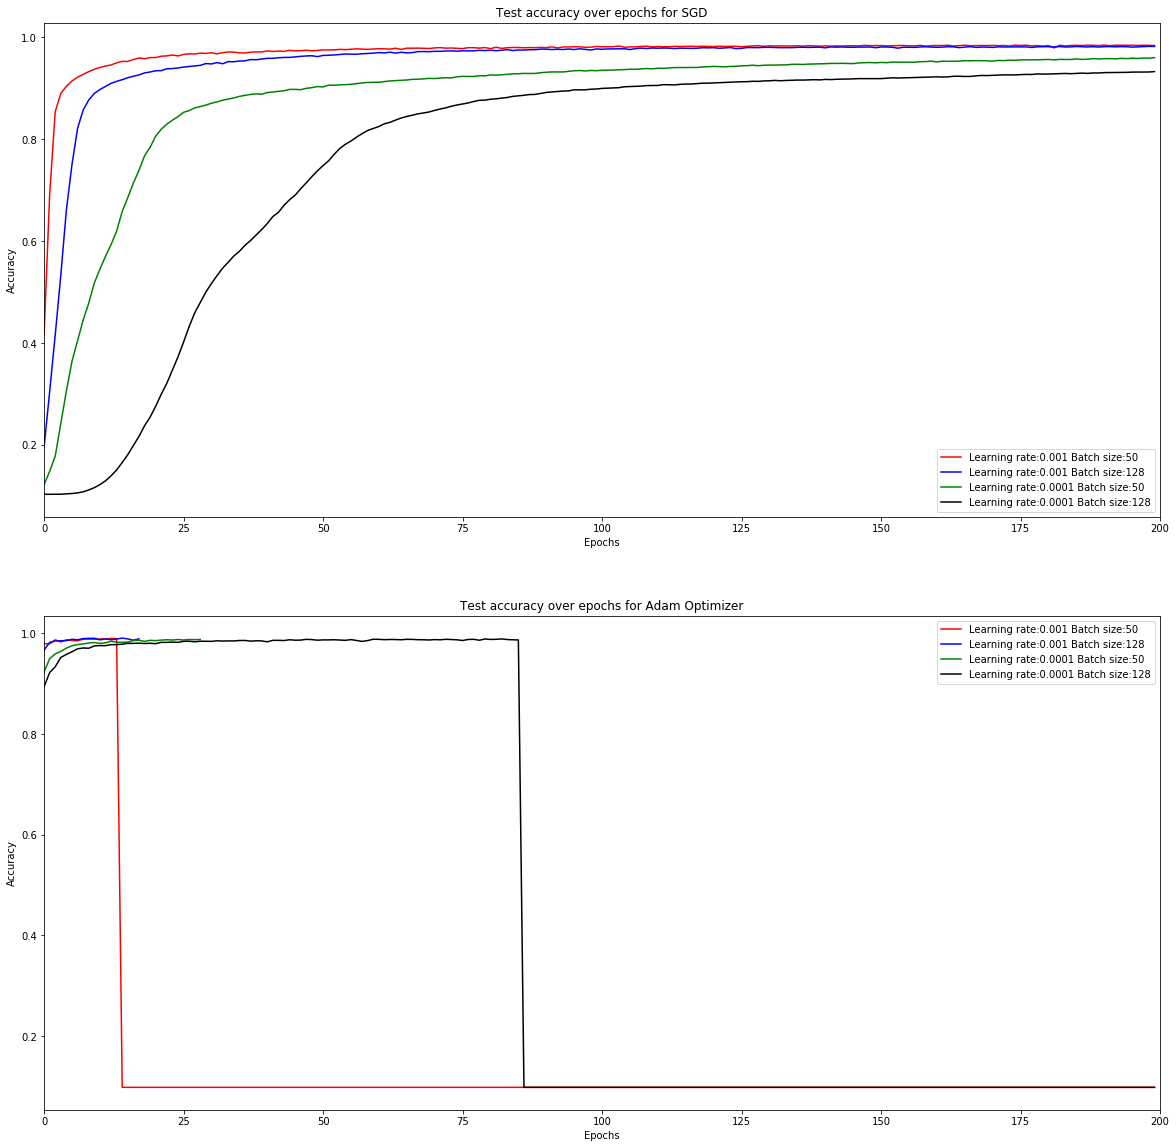

In [ ]:
plt.figure(figsize=(20,20))
plt.subplot(211)
max_epochs = max([len(results[0][4]), len(results[1][4]), len(results[2][4]), len(results[3][4])])
plt.plot(np.arange(len(results[0][4])), results[0][4], c="r", \
         label="Learning rate:" + str(results[0][0]) + " Batch size:" + str(results[0][1]))
plt.plot(np.arange(len(results[1][4])), results[1][4], c="b", \
         label="Learning rate:" + str(results[1][0]) + " Batch size:" + str(results[1][1]))
plt.plot(np.arange(len(results[2][4])), results[2][4], c="g", \
         label="Learning rate:" + str(results[2][0]) + " Batch size:" + str(results[2][1]))
plt.plot(np.arange(len(results[3][4])), results[3][4], c="k", \
         label="Learning rate:" + str(results[3][0]) + " Batch size:" + str(results[3][1]))
plt.legend()
plt.title("Test accuracy over epochs for SGD")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim((0, max_epochs))

plt.subplot(212)
max_epochs = max([len(results[4][4]), len(results[5][4]), len(results[6][4]), len(results[7][4])])
plt.plot(np.arange(len(results[4][4])), results[4][4], c="r", \
         label="Learning rate:" + str(results[4][0]) + " Batch size:" + str(results[4][1]))
plt.plot(np.arange(len(results[5][4])), results[5][4], c="b", \
         label="Learning rate:" + str(results[5][0]) + " Batch size:" + str(results[5][1]))
plt.plot(np.arange(len(results[6][4])), results[6][4], c="g", \
         label="Learning rate:" + str(results[6][0]) + " Batch size:" + str(results[6][1]))
plt.plot(np.arange(len(results[7][4])), results[7][4], c="k", \
         label="Learning rate:" + str(results[7][0]) + " Batch size:" + str(results[7][1]))
plt.legend()
plt.title("Test accuracy over epochs for Adam Optimizer")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.xlim((0, max_epochs))
plt.show()

<div class="alert alert-warning">
We sometimes obtain these drops in accuracy probably caused by vanishing gradients.
</div>

<b> Question 2.2.2 </b>  What about applying a dropout layer on the Fully connected layer and then retraining the model with the best Optimizer and parameters (Learning rate and Batch size) obtained in *Question 2.2.1*  ? (probability to keep units=0.75). For this stage ensure that the keep prob is set to 1.0 to evaluate the 
performance of the network including all nodes.

In [8]:
lr = 0.001
bs = 128
opt = "Adam"
training_epochs = 100
disp_step = 10
kp = 0.75

t1 = time.time()
val_history_do, test_history_do = train(learning_rate=lr, training_epochs=training_epochs, batch_size=bs, \
                    display_step=disp_step, optFunction=opt, verbose=True, transfer="ReLU", keep_probability=kp)
t2 = time.time() - t1
print("====> Time:", t2, "Validation accuracy:", val_history_do[-1], "Test accuracy:", test_history_do[-1])
print("Optimization Finished!")

Start Training!
Epoch:  10   =====> Loss= 0.020439351  Validation accuracy= 0.9876  Test accuracy= 0.99
Validation Accuracy over 99% reached after 16 epochs
Training Finished!
Test accuracy: 0.9899
====> Time: 277.9252426624298 Validation accuracy: 0.99 Test accuracy: 0.9899
Optimization Finished!


<div class="alert alert-warning">
With this configuration, we are able to reach 99% accuracy in a shorter time. Dropout is a useful technique and we see it here.
</div>